# Avisha Singh HW_3 (2088371)

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt ## plots
import seaborn as sns ## generates enhanced plots
import statistics
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

# 11.1. Perform EDA and summarize your findings.


In [56]:
df = pd.read_excel("Core_Swi_SM.xlsx")
# Take a quick peek, first 5 rows, at the data using the head method in Pandas
df.head()

,Depth,Porosity,TOC,Quartz,Calcite,Swirr
0,2773.88,6.78,4.3,40.1,0.0,6.999580
1,2776.00,6.17,4.4,50.5,6.5,9.163555
2,2778.13,4.99,3.5,42.6,2.6,5.775995
3,2780.25,6.10,0.4,4.8,69.7,11.773500
4,2782.48,5.72,4.1,38.5,0.6,7.096080


In [57]:
df.info()
# no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Depth     167 non-null    float64
 1   Porosity  167 non-null    float64
 2   TOC       167 non-null    float64
 3   Quartz    167 non-null    float64
 4   Calcite   167 non-null    float64
 5   Swirr     167 non-null    float64
dtypes: float64(6)
memory usage: 8.0 KB


In [58]:
## generate descriptive statistics which is very helpful
df.describe()

,Depth,Porosity,TOC,Quartz,Calcite,Swirr
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,2951.453293,4.328204,3.924551,29.079641,12.726347,10.734370
std,106.071325,1.376384,1.691170,14.429544,20.808954,5.108082
min,2773.880000,0.880000,0.400000,0.000000,0.000000,2.463680
25%,2862.655000,3.455000,2.800000,18.150000,0.000000,6.857675
50%,2945.910000,4.460000,4.100000,30.900000,2.500000,10.203875
75%,3039.715000,5.285000,5.100000,39.800000,13.350000,13.336175
max,3147.210000,8.190000,7.800000,61.800000,82.500000,27.805980


In [59]:
# Find the number of rows and columns in any dataframe by using the shape function in Pandas/Numpy
print("The number of rows is %d" %(df.shape[0]))
print("The number of columns is %d" %(df.shape[1]))

The number of rows is 167
The number of columns is 6


In [60]:
df.columns ## column labels

Index(['Depth', 'Porosity', 'TOC', 'Quartz', 'Calcite', 'Swirr'], dtype='object')

<AxesSubplot:title={'center':'Depth vs Porosity'}, xlabel='Depth'>

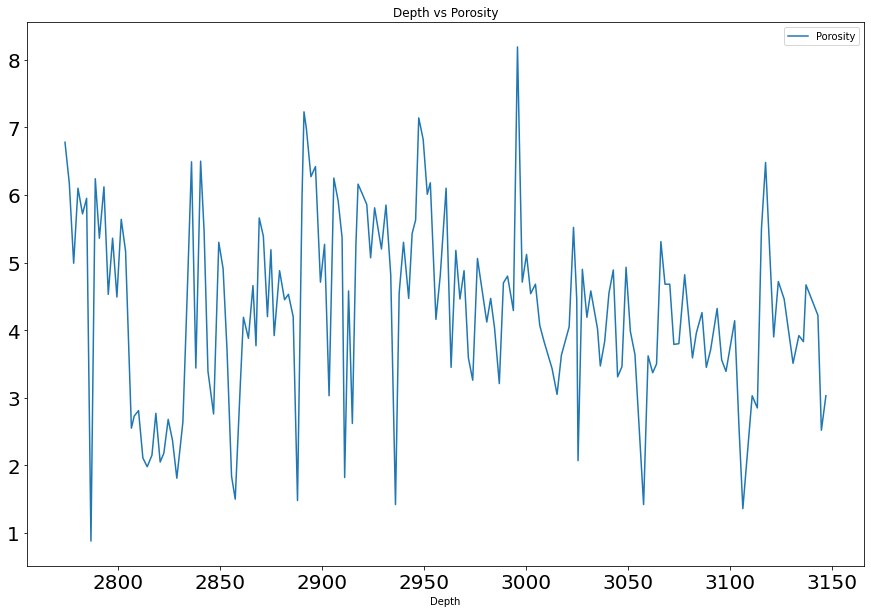

In [61]:
# Line Plot of Depth vs Porosity (x = Depth, y = Porosity)
df.plot(x = "Depth", y = "Porosity", title = "Depth vs Porosity", fontsize = 20, figsize = (15,10))

<AxesSubplot:title={'center':'Depth vs TOC'}, xlabel='Depth'>

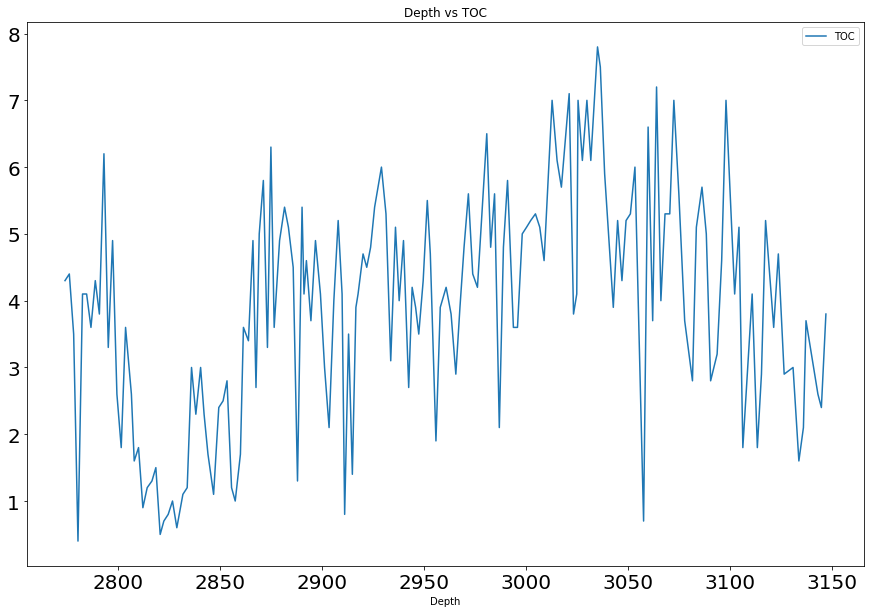

In [62]:
# Line Plot of Depth vs TOC (x = Depth, y = TOC)
df.plot(x = "Depth", y = "TOC", title = "Depth vs TOC", fontsize = 20, figsize = (15,10))

In [63]:
df1=df[['Depth','Swirr']]

Text(0.5, 1.0, 'Correlation Matrix')

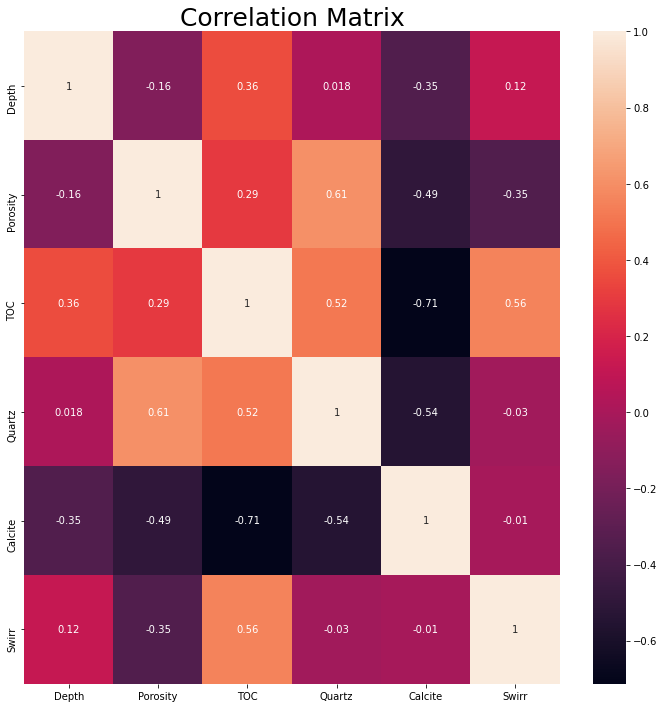

In [64]:
corr_matrix = df.corr(method="spearman")

# Create Axis
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)
# Setting Axis Properties
ax.set_title("Correlation Matrix", size = 25)

# 11.2. Make the depth an index


In [65]:
df.set_index('Depth',inplace=True)
df

,Porosity,TOC,Quartz,Calcite,Swirr
Depth,,,,,
2773.88,6.78,4.3,40.1,0.0,6.999580
2776.00,6.17,4.4,50.5,6.5,9.163555
2778.13,4.99,3.5,42.6,2.6,5.775995
2780.25,6.10,0.4,4.8,69.7,11.773500
2782.48,5.72,4.1,38.5,0.6,7.096080
...,...,...,...,...,...
3136.18,3.83,2.1,27.8,16.2,5.147555
3137.45,4.67,3.7,32.2,0.0,6.138555
3143.29,4.22,2.6,16.6,9.1,4.771580


# 11.3. Plot Swirr vs. depth

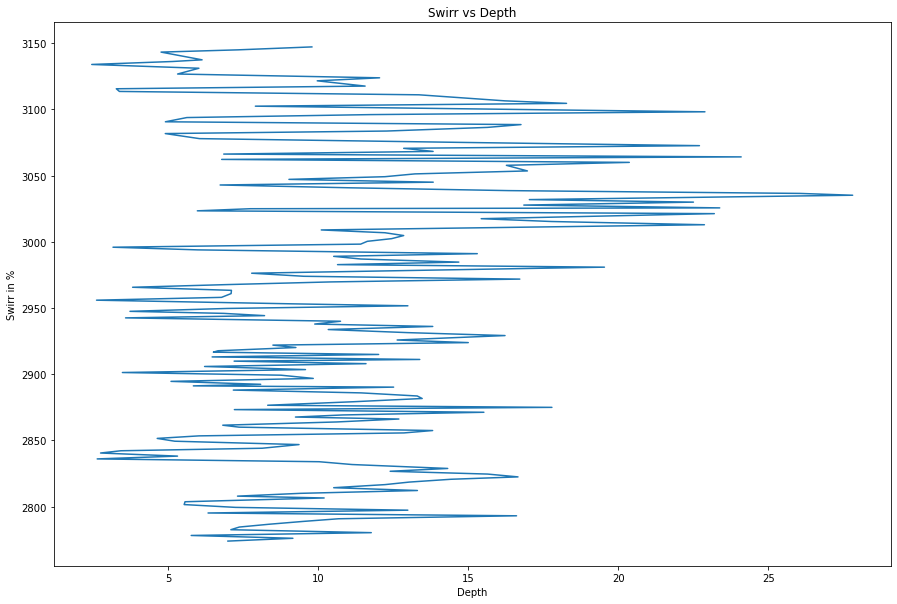

In [66]:
# Plot of Swirr vs Depth (x = Swirr and y = Depth)
plt.figure(figsize=(15,10))
plt.title("Swirr vs Depth")
plt.plot(df['Swirr'],df.index)
plt.ylabel("Swirr in %")
plt.xlabel("Depth")
plt.show()

# 11.4. Calculate the correlation matrix using spearman method and plot it.

In [67]:
Depth = df.index.values
Swirr = df['Swirr'].values

from scipy.stats import spearmanr         # spearman rank correlation

rank_corr = spearmanr(Swirr,Depth)[0]
rank_corr_p_value = spearmanr(Swirr,Depth)[1]

print('Sample Spearman rank correlation coefficient of depth and swirr is ' + str(round(rank_corr,2)))
print('Sample Spearman rank correlation coefficient of depth and swirr p-value is ' + str(round(rank_corr_p_value,4)))

Sample Spearman rank correlation coefficient of depth and swirr is 0.12
Sample Spearman rank correlation coefficient of depth and swirr p-value is 0.1172


Text(0.5, 1.0, 'Correlation Matrix')

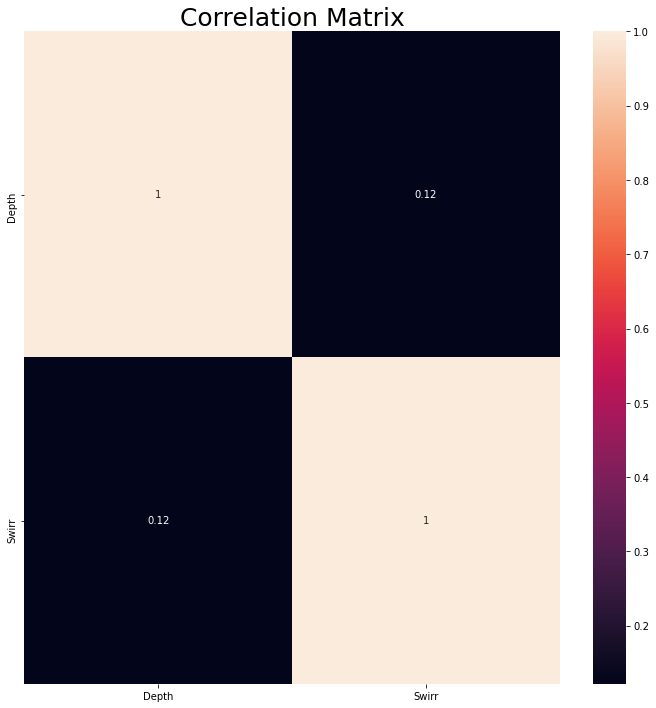

In [69]:
corr_matrix1 = df1.corr(method="spearman")
# Create Axis
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix1, xticklabels=corr_matrix1.columns, yticklabels=corr_matrix1.columns, annot=True)
# Setting Axis Properties
ax.set_title("Correlation Matrix", size = 25)

Text(0.5, 1.0, 'Correlation Matrix')

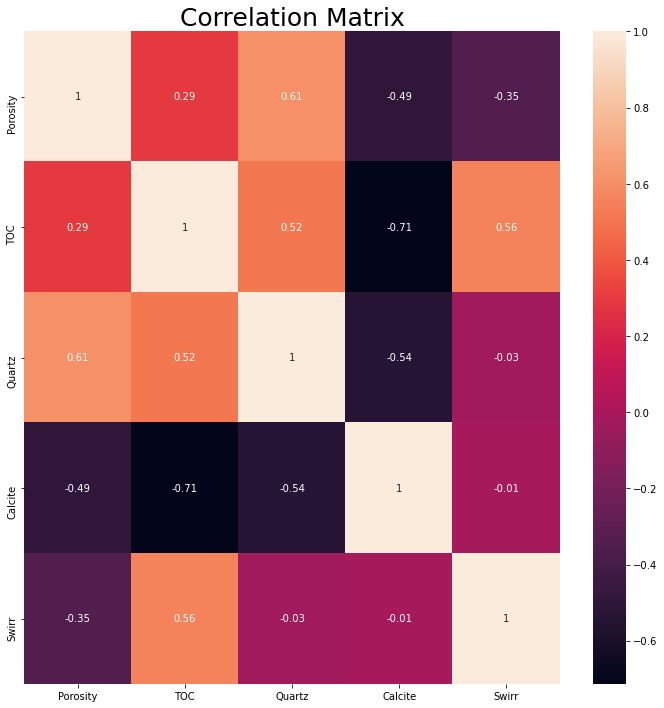

In [70]:
corr_matrix = df.corr(method="spearman")

# Create Axis
fig, ax = plt.subplots(figsize=(12, 12))

# Using Seaborn HeatMap
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot=True)
# Setting Axis Properties
ax.set_title("Correlation Matrix", size = 25)

# 11.5. Perform train-test split. Use 80% of data as the training set. The remaining as testing set

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


X = df1['Depth']
Y = df1['Swirr']

X =sm.add_constant(X)

#Use linear regression model
lr_sm=sm.OLS(Y,X).fit()  #ordinary least squares
lr_sm.summary()
#Split data to training and testing #RANDOMLY 

X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.20, random_state=224)  #80/20 train test split. 
#we set a random seed to reproduce results of the random sampling

# 11.6. Train the LinearRegression model using default values for all hyper-parameters.

In [72]:
#Create a linear regression model lr
lr=LinearRegression()
#fit and train the lr model
lr.fit(X_train,Y_train)
#predict the Aroot(k) from training data
Y_train_predict=lr.predict(X_train)
#predict the Aroot(k) from testing data
Y_test_predict=lr.predict(X_test)

# 11.7. Train the Lasso model using alpha = 1 and default values for all other hyper-parameters.

In [73]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1).fit(X_train, Y_train)

# 11.8. Train the k-Nearest Neighbor Regressor model using 7 neighbors and proximity metric p =2 and default values for all other hyper-parameters.


In [74]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=7,p=2)
kneighbor_regression.fit(X_train, Y_train) ## nothing happens here

KNeighborsRegressor(n_neighbors=7)

# 11.9. Train the Random Forest Regressor model using 200 estimators and default values for all other hyper-parameters

In [75]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True)
rf.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200)

# 11.10. Evaluate and compare the performance of the previous model on the testing and training data.

In [76]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)
corr_train=np.corrcoef(Y_train, y_pred_train) [0,1]
print('Training Data R^2=',round(corr_train**2,4),'R=', round(corr_train,4))

Training Data R^2= 0.8913 R= 0.9441


Text(0.5, 1.0, 'Depth Training Actual Vs. Prediction')

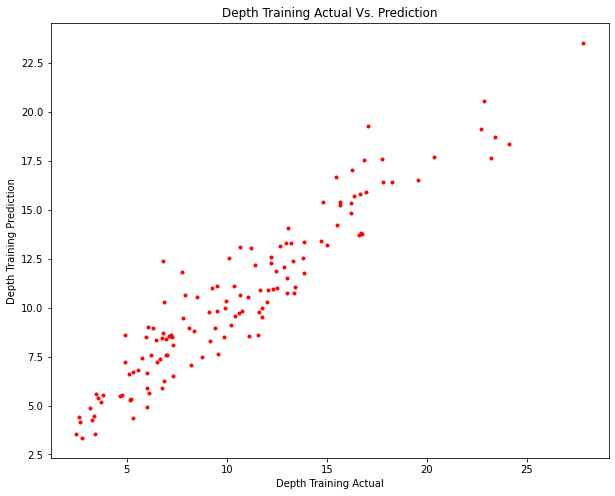

In [77]:
plt.figure(figsize=(10,8))
plt.plot(Y_train, y_pred_train, 'r.')
plt.xlabel('Depth Training Actual')
plt.ylabel('Depth Training Prediction')
plt.title('Depth Training Actual Vs. Prediction')

Text(0.5, 1.0, 'Depth Testing Actual Vs. Prediction')

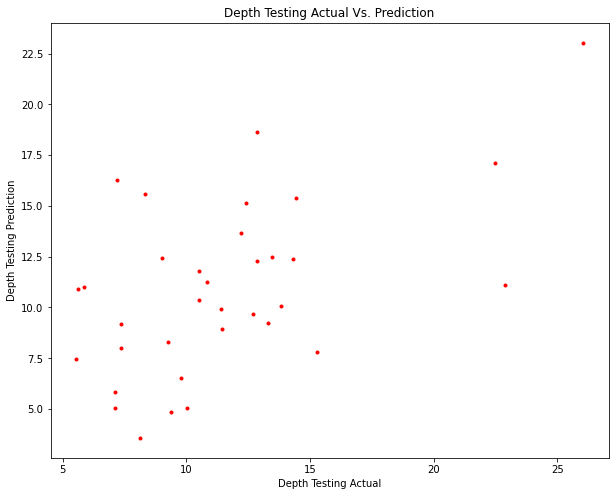

In [78]:
plt.figure(figsize=(10,8))
plt.plot(Y_test, y_pred_test, 'r.')
plt.xlabel('Depth Testing Actual')
plt.ylabel('Depth Testing Prediction')
plt.title('Depth Testing Actual Vs. Prediction')

In [79]:
Depth_Actual_Prediction=pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred_test})
Depth_Actual_Prediction

,Actual,Predicted
71,9.262995,8.282271
103,15.304000,7.813855
40,7.371355,9.193041
147,5.630880,10.921838
49,8.323680,15.597422
56,5.847355,11.025338
33,8.142395,3.573868
20,12.229875,13.685812
149,22.886395,11.114631
120,22.503195,17.101084


In [80]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(Y_test, y_pred_test),5))
print('MSE:', round(metrics.mean_squared_error(Y_test, y_pred_test),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test)),5))

MAE: 3.38447
MSE: 18.36917
RMSE: 4.28593


# 11.11. Instantiate a model for 3-fold cross validation on training data that shuffles the selection of samples from the training dataset into the folds for cross validation.

In [81]:
from sklearn.model_selection import cross_val_score
#np.random.seed(seed)
scores_R2 = cross_val_score(rf, X, Y,cv=3,scoring='r2')

print(" R2_Cross-validation scores: {}". format( scores_R2))
print(" Average R2_Cross-validation scores: {}". format( scores_R2.mean()))

 R2_Cross-validation scores: [-0.824044   -3.85307157 -0.09966513]
 Average R2_Cross-validation scores: -1.5922602336381864


# 11.12. Using the cross-validation instantiated above, perform hyperparameter optimization for the Regression Forest Regressor to find the best/optimal values of hyperparameters:min_samples_leaf, max_features, max_depth. Display the best/optimal values of hyperparameters. Comment on the model performance using the best/optimal values of hyperparameters

In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import math
# Define an evaluation function for calculating some helpful metrics
# We can calculate the mean square error and the square root of the MSE for our prediction model.

def evaluate (model, test_features, test_labels):
    predictions=model.predict(test_features)
    r2=r2_score(y_pred=predictions, y_true=test_labels)
    MAE=mean_absolute_error(test_labels, predictions)

    print('r2 = {:0.5f}'.format(r2))
    print('MAE = {:0.5f}'.format(MAE))
#use a grid search pver a specified range of possible hyperparameters values
#On your own you can modify this section to look into other possible parameters
param_grid={
    'min_samples_leaf':[1,2,3,4,9],
    'max_features':['auto','sqrt','log2',None],
    'max_depth':[80,90,100,180,200,270,360]
}

In [84]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rf,
                      param_grid=param_grid,
                      cv=7,n_jobs=-1,verbose=2)

In [85]:

grid_search.fit(X_train,Y_train)

Fitting 7 folds for each of 140 candidates, totalling 980 fits


GridSearchCV(cv=7, estimator=RandomForestRegressor(n_estimators=200), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 180, 200, 270, 360],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 9]},
             verbose=2)

In [86]:
print('Best CV accuracy: {}, with parameters: {}'.format(
grid_search.best_score_,grid_search.best_params_))

Best CV accuracy: 0.1541867308594941, with parameters: {'max_depth': 180, 'max_features': 'auto', 'min_samples_leaf': 4}


In [87]:
best_model=grid_search.best_estimator_
r2=evaluate(rf,X_test,Y_test)

r2 = 0.16689
MAE = 3.38447
